In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
def imshow(title =" ", image = None, size = 5):
    w,h = image.shape[0],image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Ans 8


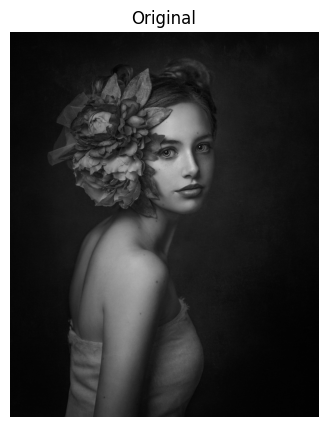

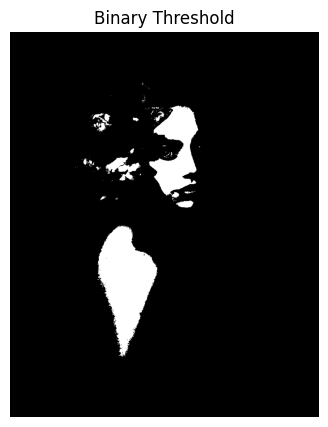

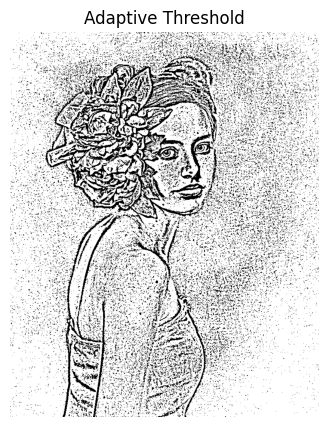

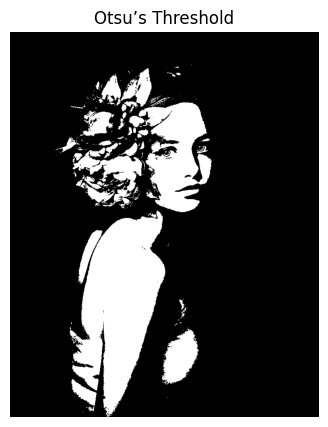

In [7]:
img = cv2.imread(r"C:\hg3\New folder\6.jpg",0) # Grayscale
# 1️ Binary Threshold
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# 2️ Adaptive Threshold
adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2)
# 3️ Otsu’s Threshold
_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

imshow("Original", cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))
imshow("Binary Threshold", cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR))
imshow("Adaptive Threshold", cv2.cvtColor(adaptive, cv2.COLOR_GRAY2BGR))
imshow("Otsu’s Threshold", cv2.cvtColor(otsu, cv2.COLOR_GRAY2BGR))

# Ans 9


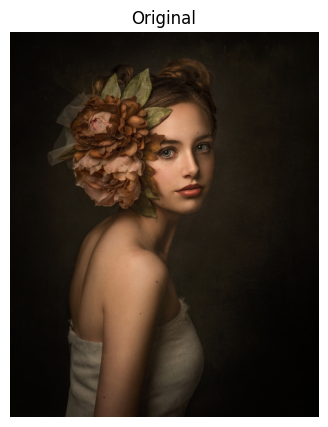

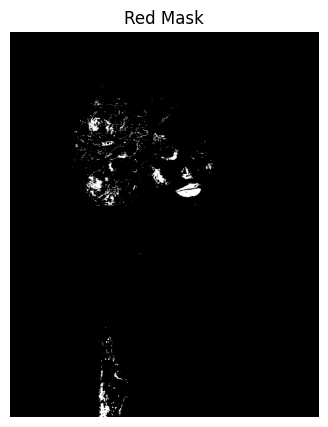

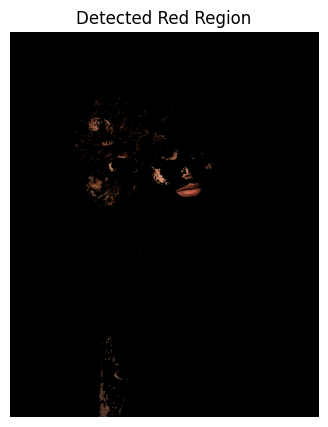

In [8]:
img = cv2.imread(r"C:\hg3\New folder\6.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Red color range
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask = mask1 + mask2
res = cv2.bitwise_and(img, img, mask=mask)

imshow("Original", img)
imshow("Red Mask", cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
imshow("Detected Red Region", res)

# Ans 10

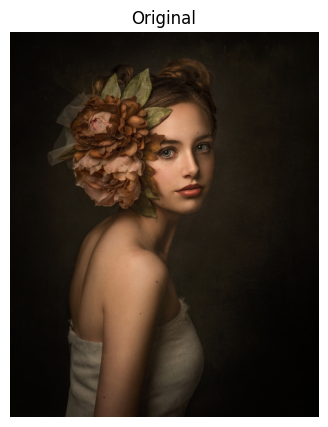

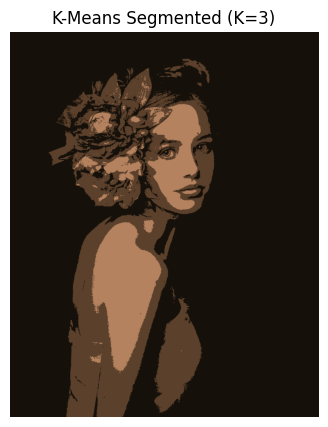

In [9]:
# 10. K-Means Clustering Segmentation (k = 3)
img = cv2.imread(r"C:\hg3\New folder\6.jpg")
Z = img.reshape((-1, 3))
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
_, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

imshow("Original", img)
imshow("K-Means Segmented (K=3)", res2)


# Ans 10

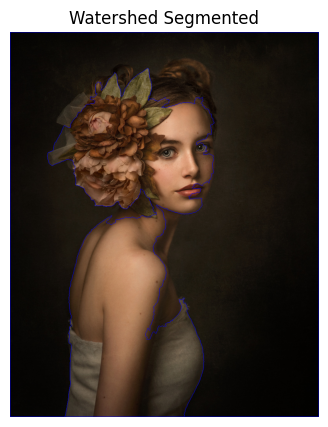

In [11]:
# 11. Watershed Segmentation
img = cv2.imread(r"C:\hg3\New folder\6.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret , thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3) 

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

imshow("Watershed Segmented", img)

# Ans 12


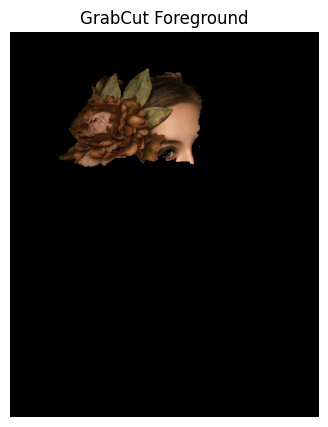

In [13]:
# 12. GrabCut Segmentation

img = cv2.imread(r"C:\hg3\New folder\6.jpg")
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 50, 450, 300)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img_cut = img * mask2[:, :, np.newaxis]

imshow("GrabCut Foreground", img_cut)

# Ans 13

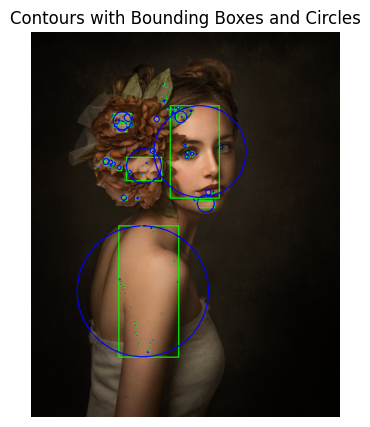

In [14]:
# 13. Contour Detection and Bounding Shapes
img = cv2.imread(r"C:\hg3\New folder\6.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    (x_center, y_center), radius = cv2.minEnclosingCircle(c)
    center = (int(x_center), int(y_center))
    radius = int(radius)
    cv2.circle(img, center, radius, (255, 0, 0), 2)

imshow("Contours with Bounding Boxes and Circles", img)